# Auto Regressive Network Inference 

To run this notebook (results are tested agains julia-1.5.3 and julia-1.6.0:

1. Install the [julia](https://julialang.org/downloads/)

2. Install [PyPlot](https://github.com/JuliaPy/PyPlot.jl) package. To enter in the package manager, just type `]` and from the package manager prompt do a
```
(@v1.5) pkg> add PyPlot
```

3. Install the unregistered [PlmDCA](https://github.com/pagnani/PlmDCA) package. From the package manager prompt do a
```
(@v1.5) pkg> add https://github.com/pagnani/PlmDCA
```

4. Install the ipynb interface in julia, you should add the [IJulia](https://github.com/JuliaLang/IJulia.jl) package using the package manager. Again, from the package manager prompt do a
```
(@v1.5) pkg> add IJulia 
```
Exit the Package Manager (type `backspace` or `delete`) and from julia prompt do a 
```
julia> using IJulia
julia> notebook()
```
The ipynb file manager should open a page on your browser and from there you should navigate to this notebook.


## Load ArDCA package 

The following cell loads the package `ArDCA` on `nprocs` workers (here `nprocs=8`). The first time it takes a while. 

* The `mypkgdir` variable should be set to your `path/to/package` dir.

* The `datadir` variable points to the `five families autoregressive` path we shared.

In [1]:
mypkgdir = normpath(joinpath(pwd(),".."))
datadir=joinpath(mypkgdir,"data") # put here your path
#cd(mypkgdir)
using Pkg
Pkg.activate(mypkgdir)
using PyPlot
using ArDCA
using PlmDCA
include(joinpath(mypkgdir,"julia-notebook/script.jl")); # a script with some utilities

  Activating environment at `~/CODE/ArDCA/Project.toml`


"/Users/pagnani/CODE/ArDCA/"

## Define the protein family 


The `out` strcture is defined in the `script.jl` file.
```
mutable struct AnalOut
    arnet # the ArDCA inferred model parameters
    arvar # the internal variables
    resori::Union{PlmOut,Nothing} # the PlmDCA output of the original MSA
    resgen::Union{PlmOut,Nothing} # the PlmDCA output of the generated MSA
    rocori::Union{Nothing,Array{Tuple{Int64,Int64,Float64,Float64}}} # score of original MSA
    rocgen::Union{Nothing,Array{Tuple{Int64,Int64,Float64,Float64}}} # score of generated MSA
    Zgen::Union{Nothing,Array{Int,2}}
end
```

In [2]:
family=joinpath(datadir,"PF14")
out = AnalOut(nothing,nothing,nothing,nothing, nothing,nothing,nothing,nothing,nothing);

## Run ArDCA analyis

beside `lambdaJ, lambdaH`, possible keywork arguments are (with their default value):

* `epsconv::Real=1.0e-5` (convergenge parameter)

* `maxit::Int=1000` (maximum number of iteration - don't change)

* `verbose::Bool=true` (set to `false` to suppress printing on screen)

* `method::Symbol=:LD_LBFGS` (optimization method)

* `permorder::Union{Symbol,Vector{Ti}}=:ENTROPIC` (permutation order). Possible values are: `[:NATURAL, :ENTROPIC, :REV_ENTROPIC, :RANDOM]` or a custom permutation vector.





In [3]:
runardca!(out,family,lambdaJ=0.02,lambdaH=0.001);

removing duplicate sequences... done: 13600 -> 8871
θ = 0.3308846126401105 threshold = 17.0
M = 8871 N = 53 Meff = 2950.925530761646
site = 15	pl = 1.2028	time = 1.6234	status = FTOL_REACHED
site = 35	pl = 2.2504	time = 1.9718	status = FTOL_REACHED
site = 1	pl = 0.0996	time = 0.0712	status = FTOL_REACHED
site = 22	pl = 1.7230	time = 1.8267	status = FTOL_REACHED
site = 41	pl = 2.5040	time = 1.9504	status = FTOL_REACHED
site = 8	pl = 0.5179	time = 1.5088	status = FTOL_REACHED
site = 47	pl = 2.5519	time = 1.9963	status = FTOL_REACHED
site = 29	pl = 2.2007	time = 1.8657	status = FTOL_REACHED
site = 2	pl = 0.1976	time = 0.0947	status = FTOL_REACHED
site = 9	pl = 0.7186	time = 0.1832	status = FTOL_REACHED
site = 3	pl = 0.1890	time = 0.0998	status = FTOL_REACHED
site = 16	pl = 1.2504	time = 0.2755	status = FTOL_REACHED
site = 4	pl = 0.2888	time = 0.1211	status = FTOL_REACHED
site = 10	pl = 0.7271	time = 0.2327	status = FTOL_REACHED
site = 23	pl = 1.7631	time = 0.4216	status = FTOL_REACHED
sit

## Sampling

The following produces `Msample` samples. By default, `Msample` is number of samples from the original alignment, but it can be changed as a keyword argument. We also run PlmDCA on the true alignment, and the generated one.

In [4]:
sample_and_analyze_results!(out,family);

site = 1	 pl = 1.7956	 time = 1.5416	exit status = FTOL_REACHED
site = 42	 pl = 0.3991	 time = 1.5819	exit status = FTOL_REACHED
site = 15	 pl = 2.5754	 time = 1.5859	exit status = FTOL_REACHED
site = 22	 pl = 2.6008	 time = 1.6159	exit status = FTOL_REACHED
site = 8	 pl = 2.6048	 time = 0.5587	exit status = FTOL_REACHED
site = 36	 pl = 2.1670	 time = 1.6999	exit status = FTOL_REACHED
site = 29	 pl = 2.5041	 time = 1.6942	exit status = FTOL_REACHED
site = 2	 pl = 0.3508	 time = 0.4470	exit status = FTOL_REACHED
site = 9	 pl = 0.5257	 time = 0.4034	exit status = FTOL_REACHED
site = 48	 pl = 0.1559	 time = 2.1039	exit status = FTOL_REACHED
site = 30	 pl = 0.5606	 time = 0.4818	exit status = FTOL_REACHED
site = 16	 pl = 2.5820	 time = 0.6176	exit status = FTOL_REACHED
site = 37	 pl = 0.7725	 time = 0.5307	exit status = FTOL_REACHED
site = 23	 pl = 2.6404	 time = 0.6340	exit status = FTOL_REACHED
site = 43	 pl = 2.6621	 time = 0.7519	exit status = FTOL_REACHED
site = 3	 pl = 2.7237	 time =

## Plotting  the results

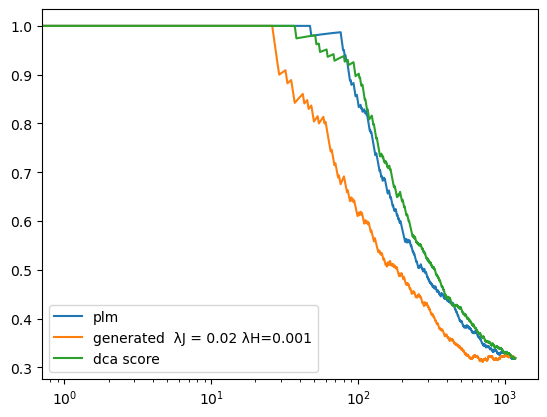

(0.7022602821872387, 1673.1688090637567)

In [5]:
plotres(out)